## Data Preparation: Notebook shows how you prepare your data and explains why by including…  
- Instructions or code needed to get and prepare the raw data for analysis  
- Code comments and text to explain what your data preparation code does  
- Valid justifications for why the steps you took are appropriate for the problem you are solving  

# Joining Hurricane and Housing Dataframes 

In [1]:
#Importing libraries needed
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Obtaining Data 

In [27]:
#opening dataframes 
bottom =  pd.read_csv(r'data\bottom_housing.csv')
middle = pd.read_csv(r'data\middle_housing.csv')
top = pd.read_csv(r'data\top_housing.csv')
hurricane = pd.read_csv(r'data\hurricane_cleaned.csv')

In [28]:
bottom.head()

,City,HurricaneName,SizeRank,before,after,percent,increase
0,Jacksonville,charley,12,46528.30349,52803.32790,13.486467,0
1,Orlando,charley,16,75863.27537,88560.22345,16.736620,0
2,Miami,charley,20,86752.55847,106338.70750,22.577028,0
3,Tampa,charley,50,51585.41060,61309.89329,18.851227,0
4,Saint Petersburg,charley,84,47796.13229,57880.05754,21.097785,0


In [29]:
middle.head()

,City,HurricaneName,SizeRank,before,after,percent,increase
0,Jacksonville,charley,12,120287.1799,136338.2043,13.343919,0
1,Orlando,charley,16,153628.1167,178133.7990,15.951300,0
2,Miami,charley,20,196585.3564,242294.9810,23.251795,1
3,Tampa,charley,50,134130.4031,158405.6253,18.098225,0
4,Saint Petersburg,charley,84,112809.7002,134746.5950,19.445930,0


In [30]:
top.head()

,City,HurricaneName,SizeRank,before,after,percent,increase
0,Jacksonville,charley,12,219711.2386,249137.7656,13.393273,0
1,Orlando,charley,16,268593.0990,311622.3096,16.020222,0
2,Miami,charley,20,438933.0461,531656.5319,21.124745,0
3,Tampa,charley,50,314461.3881,368173.9723,17.080820,0
4,Saint Petersburg,charley,84,245925.9512,292718.6866,19.027165,0


In [31]:
hurricane

,DATE,AWND,WSF2,HurricaneName,City
0,8/14/2004,5.82000,13.0000,1,Apalachicola
1,7/10/2005,19.46000,30.0000,2,Apalachicola
2,7/11/2005,17.00000,32.0000,2,Apalachicola
3,10/7/2016,10.74000,21.9000,3,Apalachicola
4,10/8/2016,8.05000,15.0000,3,Apalachicola
...,...,...,...,...,...
534,9/9/2017,16.55000,25.9000,4,Winter Haven
535,10/11/2018,7.38000,16.1000,5,Winter Haven
536,10/10/2018,13.20000,25.1000,5,Winter Haven
537,10/9/2018,11.63000,18.1000,5,Winter Haven


## Data Scrubbing

In [32]:
hurricane.isna().sum()

DATE             0
AWND             0
WSF2             0
HurricaneName    0
City             0
dtype: int64

# Joining Housing Values with Hurricanes 
In order to do logistic regression on our data we need to join the datasets. We will use the join method joining the hurricane dataset into the housing dataset. 

Documentation can be found here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html

In [34]:
hurricane.loc[hurricane['HurricaneName'] == 6]

,DATE,AWND,WSF2,HurricaneName,City
10,9/28/2022,38.027300,57.93571,6,Apalachicola
16,9/28/2022,26.015147,51.44870,6,Bonifay
28,9/28/2022,42.031351,74.04139,6,Brooksville
53,9/28/2022,13.510876,36.01409,6,Crestview
66,9/29/2022,40.532628,65.09379,6,Cross City
79,9/29/2022,74.063759,138.68780,6,Daytona Beach
91,9/28/2022,32.524526,48.98811,6,Destin
114,9/28/2022,42.031351,71.58080,6,Fort Lauderdale
115,9/28/2022,50.531571,78.51519,6,Fort Lauderdale
138,9/28/2022,49.547335,74.04139,6,Fort Myers


In [35]:
hurricane['HurricaneName'] = hurricane['HurricaneName'].astype(str).map({'1': 'charley', '2': 'dennis', '3': 'matthew', '4':'irma', '5':'michael', '6': 'ian'})

In [36]:
hurricane

,DATE,AWND,WSF2,HurricaneName,City
0,8/14/2004,5.82000,13.0000,charley,Apalachicola
1,7/10/2005,19.46000,30.0000,dennis,Apalachicola
2,7/11/2005,17.00000,32.0000,dennis,Apalachicola
3,10/7/2016,10.74000,21.9000,matthew,Apalachicola
4,10/8/2016,8.05000,15.0000,matthew,Apalachicola
...,...,...,...,...,...
534,9/9/2017,16.55000,25.9000,irma,Winter Haven
535,10/11/2018,7.38000,16.1000,michael,Winter Haven
536,10/10/2018,13.20000,25.1000,michael,Winter Haven
537,10/9/2018,11.63000,18.1000,michael,Winter Haven


In [37]:
hurricane.loc[hurricane['HurricaneName'] == 'ian']

,DATE,AWND,WSF2,HurricaneName,City
10,9/28/2022,38.027300,57.93571,ian,Apalachicola
16,9/28/2022,26.015147,51.44870,ian,Bonifay
28,9/28/2022,42.031351,74.04139,ian,Brooksville
53,9/28/2022,13.510876,36.01409,ian,Crestview
66,9/29/2022,40.532628,65.09379,ian,Cross City
79,9/29/2022,74.063759,138.68780,ian,Daytona Beach
91,9/28/2022,32.524526,48.98811,ian,Destin
114,9/28/2022,42.031351,71.58080,ian,Fort Lauderdale
115,9/28/2022,50.531571,78.51519,ian,Fort Lauderdale
138,9/28/2022,49.547335,74.04139,ian,Fort Myers


In [38]:
#saving the data
hurricane.to_csv(r'data\hurricane_name.csv', index=False)

In [39]:
#opening dataframes 
hurricane = pd.read_csv(r'data\hurricane_name.csv')
#setting the index to city and HurricaneName so that we use .join()
hurricane.set_index(['City', 'HurricaneName'], inplace = True)

### Writing a Function
This function will be used to join our housing data with our hurricane data

In [40]:
def join(df):
    #setting the index
    df.set_index(['City', 'HurricaneName'], inplace = True)
    #joining the dataframe
    df = hurricane.join(df, how='inner')
    #reseting the index
    df.reset_index(inplace = True)
    return df

## Joining Bottom Tier Home Values with Hurricane Data

In [41]:
bottom_hurricane = join(bottom)
bottom_hurricane

,City,HurricaneName,DATE,AWND,WSF2,SizeRank,before,after,percent,increase
0,Apalachicola,charley,8/14/2004,5.8200,13.00000,12877,33025.67901,41196.08834,24.739565,1
1,Apalachicola,dennis,7/10/2005,19.4600,30.00000,12877,40369.46137,50891.84431,26.065205,0
2,Apalachicola,dennis,7/11/2005,17.0000,32.00000,12877,40369.46137,50891.84431,26.065205,0
3,Apalachicola,ian,9/28/2022,38.0273,57.93571,12877,65287.07867,76710.34737,17.496982,1
4,Apalachicola,irma,9/11/2017,20.8000,36.90000,12877,52379.75722,63594.00344,21.409504,1
...,...,...,...,...,...,...,...,...,...,...
428,Winter Haven,matthew,10/7/2016,13.4200,25.90000,395,69267.39054,80862.30360,16.739353,1
429,Winter Haven,matthew,10/8/2016,8.7200,18.10000,395,69267.39054,80862.30360,16.739353,1
430,Winter Haven,michael,10/11/2018,7.3800,16.10000,395,94132.64063,110238.51310,17.109764,1
431,Winter Haven,michael,10/10/2018,13.2000,25.10000,395,94132.64063,110238.51310,17.109764,1


## Joining Middle Tier Home Values with Hurricane Data 

In [42]:
middle_hurricane = join(middle)
middle_hurricane

,City,HurricaneName,DATE,AWND,WSF2,SizeRank,before,after,percent,increase
0,Apalachicola,charley,8/14/2004,5.8200,13.00000,12877,91915.39335,114408.1491,24.471152,1
1,Apalachicola,dennis,7/10/2005,19.4600,30.00000,12877,112287.89680,140227.0087,24.881677,0
2,Apalachicola,dennis,7/11/2005,17.0000,32.00000,12877,112287.89680,140227.0087,24.881677,0
3,Apalachicola,ian,9/28/2022,38.0273,57.93571,12877,144565.87220,161515.9275,11.724797,1
4,Apalachicola,irma,9/11/2017,20.8000,36.90000,12877,127923.42670,142053.1799,11.045477,0
...,...,...,...,...,...,...,...,...,...,...
421,West Palm Beach,matthew,10/7/2016,19.6900,31.10000,158,197641.97590,216511.5252,9.547339,0
422,West Palm Beach,matthew,10/8/2016,10.5100,17.00000,158,197641.97590,216511.5252,9.547339,0
423,West Palm Beach,michael,10/11/2018,6.9300,17.00000,158,235358.13210,250692.0721,6.515152,0
424,West Palm Beach,michael,10/10/2018,12.7500,25.10000,158,235358.13210,250692.0721,6.515152,0


## Joining Top Tier Home Values with Hurricane Data

In [43]:
top_hurricane = join(top)
top_hurricane

,City,HurricaneName,DATE,AWND,WSF2,SizeRank,before,after,percent,increase
0,Apalachicola,charley,8/14/2004,5.8200,13.00000,12877,221794.3003,275297.2698,24.122788,1
1,Apalachicola,dennis,7/10/2005,19.4600,30.00000,12877,269923.5452,339439.8016,25.754054,0
2,Apalachicola,dennis,7/11/2005,17.0000,32.00000,12877,269923.5452,339439.8016,25.754054,0
3,Apalachicola,ian,9/28/2022,38.0273,57.93571,12877,279871.2479,308859.8100,10.357821,1
4,Apalachicola,irma,9/11/2017,20.8000,36.90000,12877,257605.2886,276477.8214,7.326143,0
...,...,...,...,...,...,...,...,...,...,...
430,West Palm Beach,matthew,10/7/2016,19.6900,31.10000,158,375111.3104,393070.8116,4.787779,0
431,West Palm Beach,matthew,10/8/2016,10.5100,17.00000,158,375111.3104,393070.8116,4.787779,0
432,West Palm Beach,michael,10/11/2018,6.9300,17.00000,158,414414.1815,434088.9600,4.747612,0
433,West Palm Beach,michael,10/10/2018,12.7500,25.10000,158,414414.1815,434088.9600,4.747612,0


## Creating a Dataset with Bottom, Middle, and Top Tier Homes

In [44]:
#concating the five dataframes into one 
all_hurricane = hurricane = pd.concat([bottom_hurricane, middle_hurricane, top_hurricane], ignore_index=True)
all_hurricane

,City,HurricaneName,DATE,AWND,WSF2,SizeRank,before,after,percent,increase
0,Apalachicola,charley,8/14/2004,5.8200,13.00000,12877,33025.67901,41196.08834,24.739565,1
1,Apalachicola,dennis,7/10/2005,19.4600,30.00000,12877,40369.46137,50891.84431,26.065205,0
2,Apalachicola,dennis,7/11/2005,17.0000,32.00000,12877,40369.46137,50891.84431,26.065205,0
3,Apalachicola,ian,9/28/2022,38.0273,57.93571,12877,65287.07867,76710.34737,17.496982,1
4,Apalachicola,irma,9/11/2017,20.8000,36.90000,12877,52379.75722,63594.00344,21.409504,1
...,...,...,...,...,...,...,...,...,...,...
1289,West Palm Beach,matthew,10/7/2016,19.6900,31.10000,158,375111.31040,393070.81160,4.787779,0
1290,West Palm Beach,matthew,10/8/2016,10.5100,17.00000,158,375111.31040,393070.81160,4.787779,0
1291,West Palm Beach,michael,10/11/2018,6.9300,17.00000,158,414414.18150,434088.96000,4.747612,0
1292,West Palm Beach,michael,10/10/2018,12.7500,25.10000,158,414414.18150,434088.96000,4.747612,0


## Data Exploration

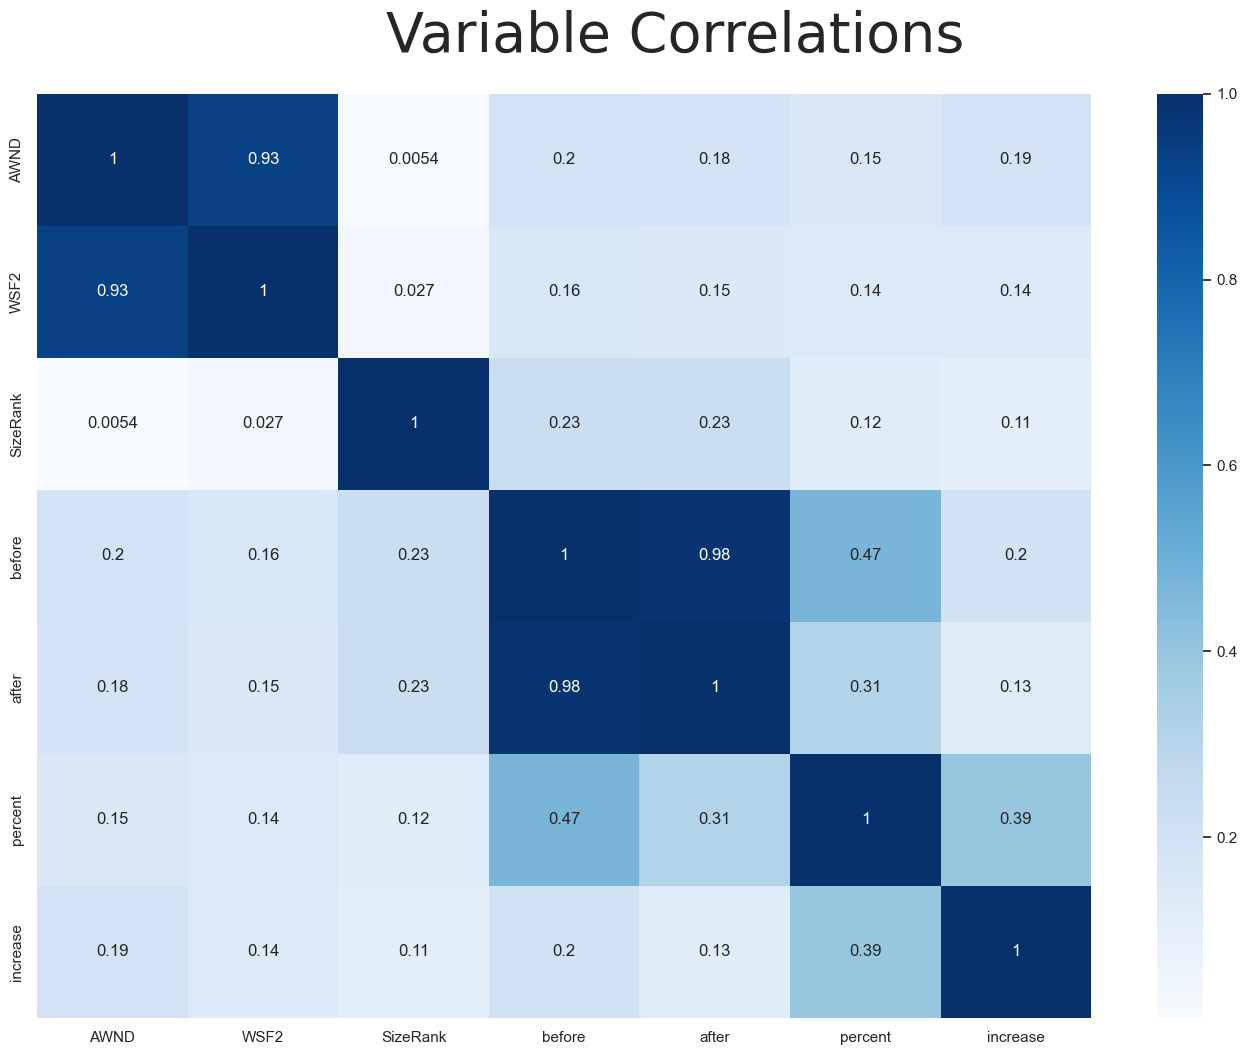

In [45]:
#checking variable correlations for bottom tier housing 
corr = bottom_hurricane.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=40, y=.95, fontname='DejaVu Sans')
heatmap = sns.heatmap(corr, cmap='Blues', annot=True)

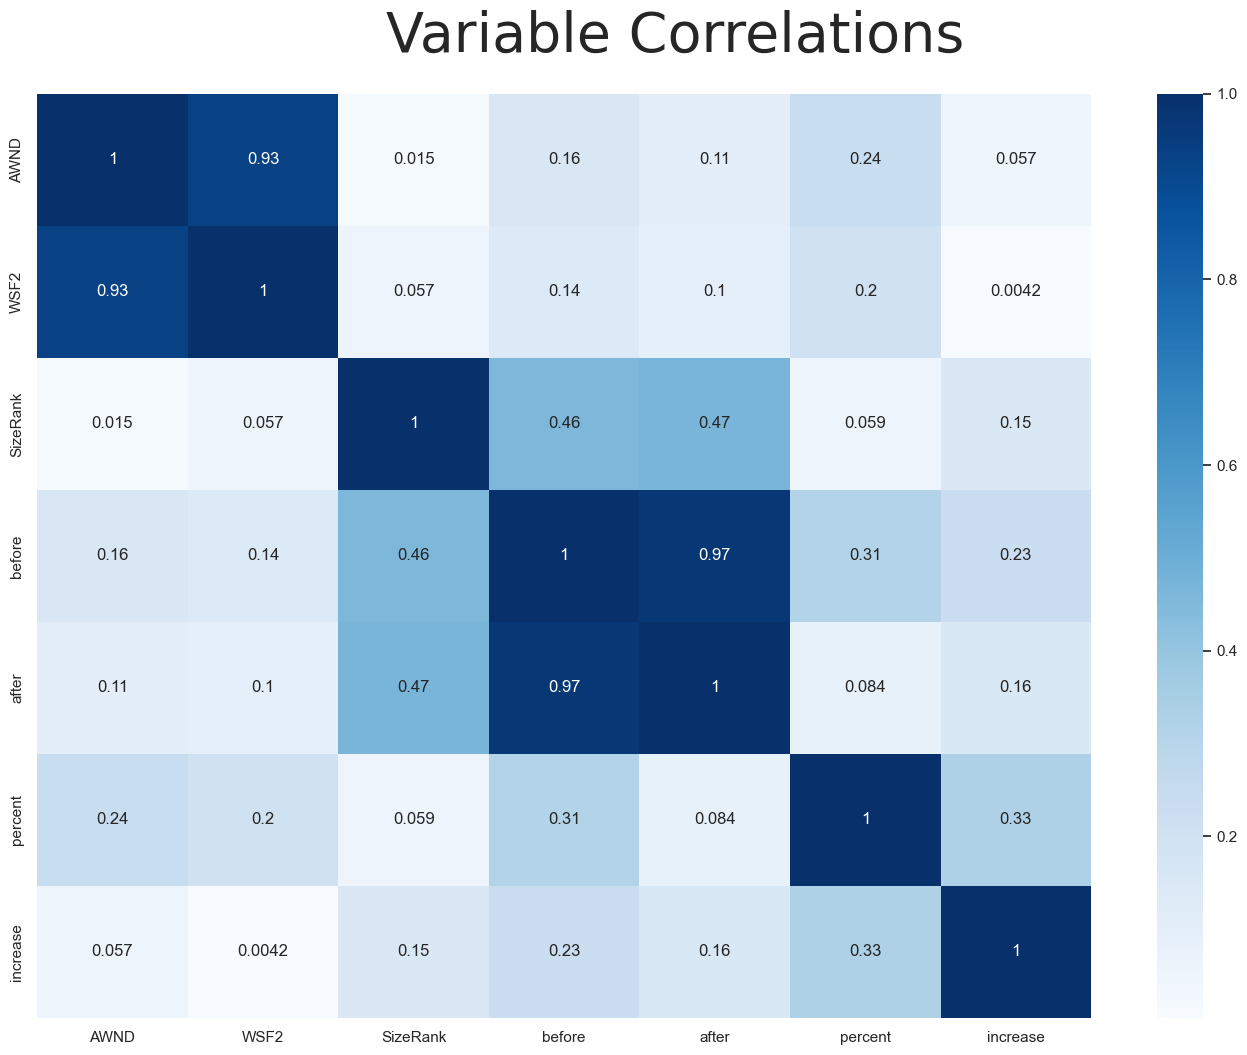

In [46]:
#checking variable correlations for bottom tier housing 
corr = middle_hurricane.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=40, y=.95, fontname='DejaVu Sans')
heatmap = sns.heatmap(corr, cmap='Blues', annot=True)

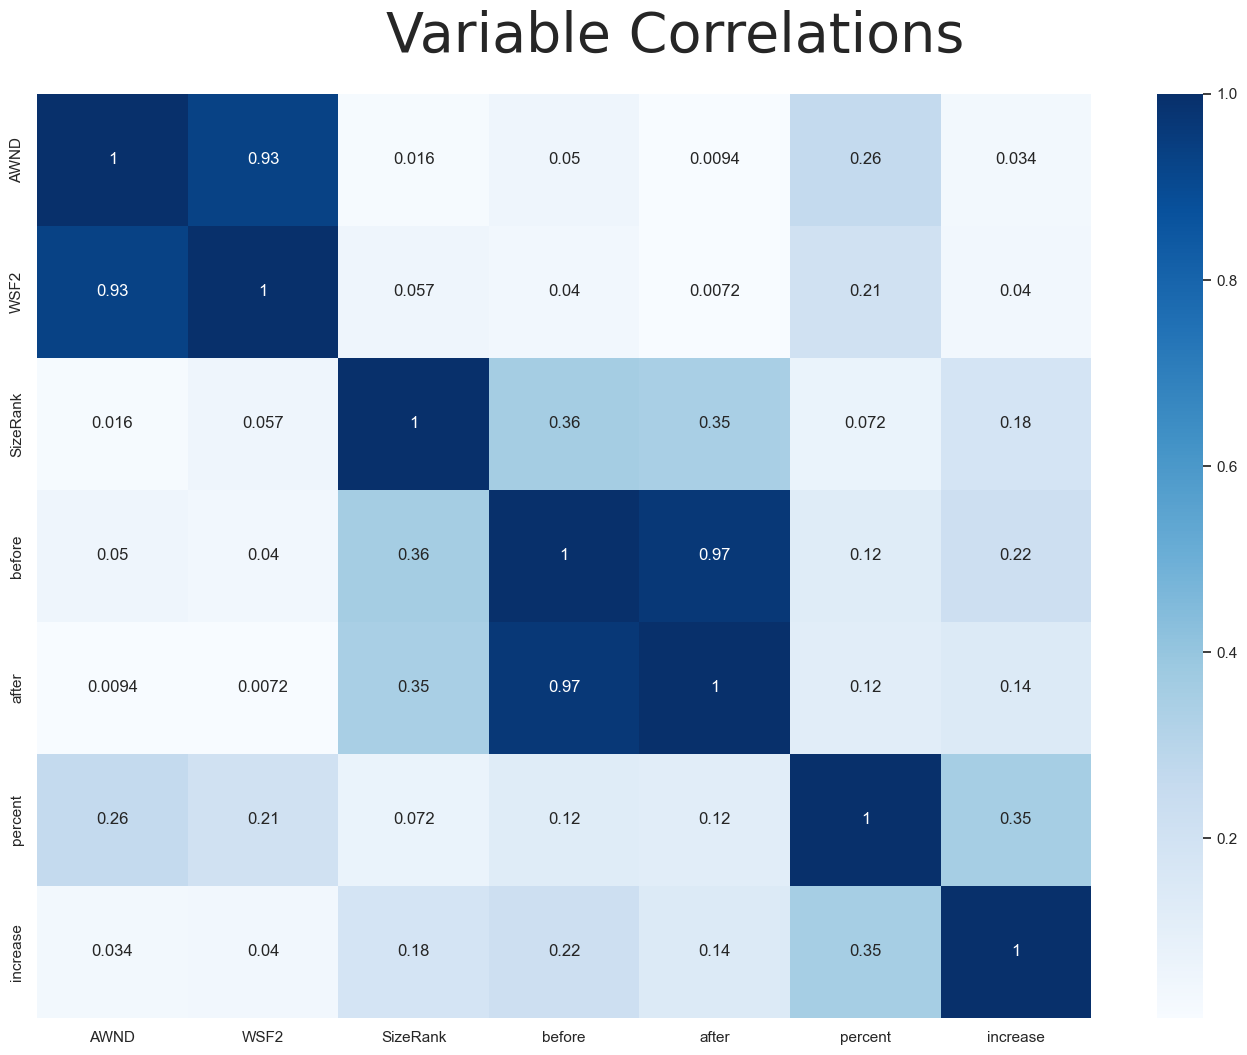

In [47]:
#checking variable correlations for bottom tier housing 
corr = top_hurricane.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=40, y=.95, fontname='DejaVu Sans')
heatmap = sns.heatmap(corr, cmap='Blues', annot=True)

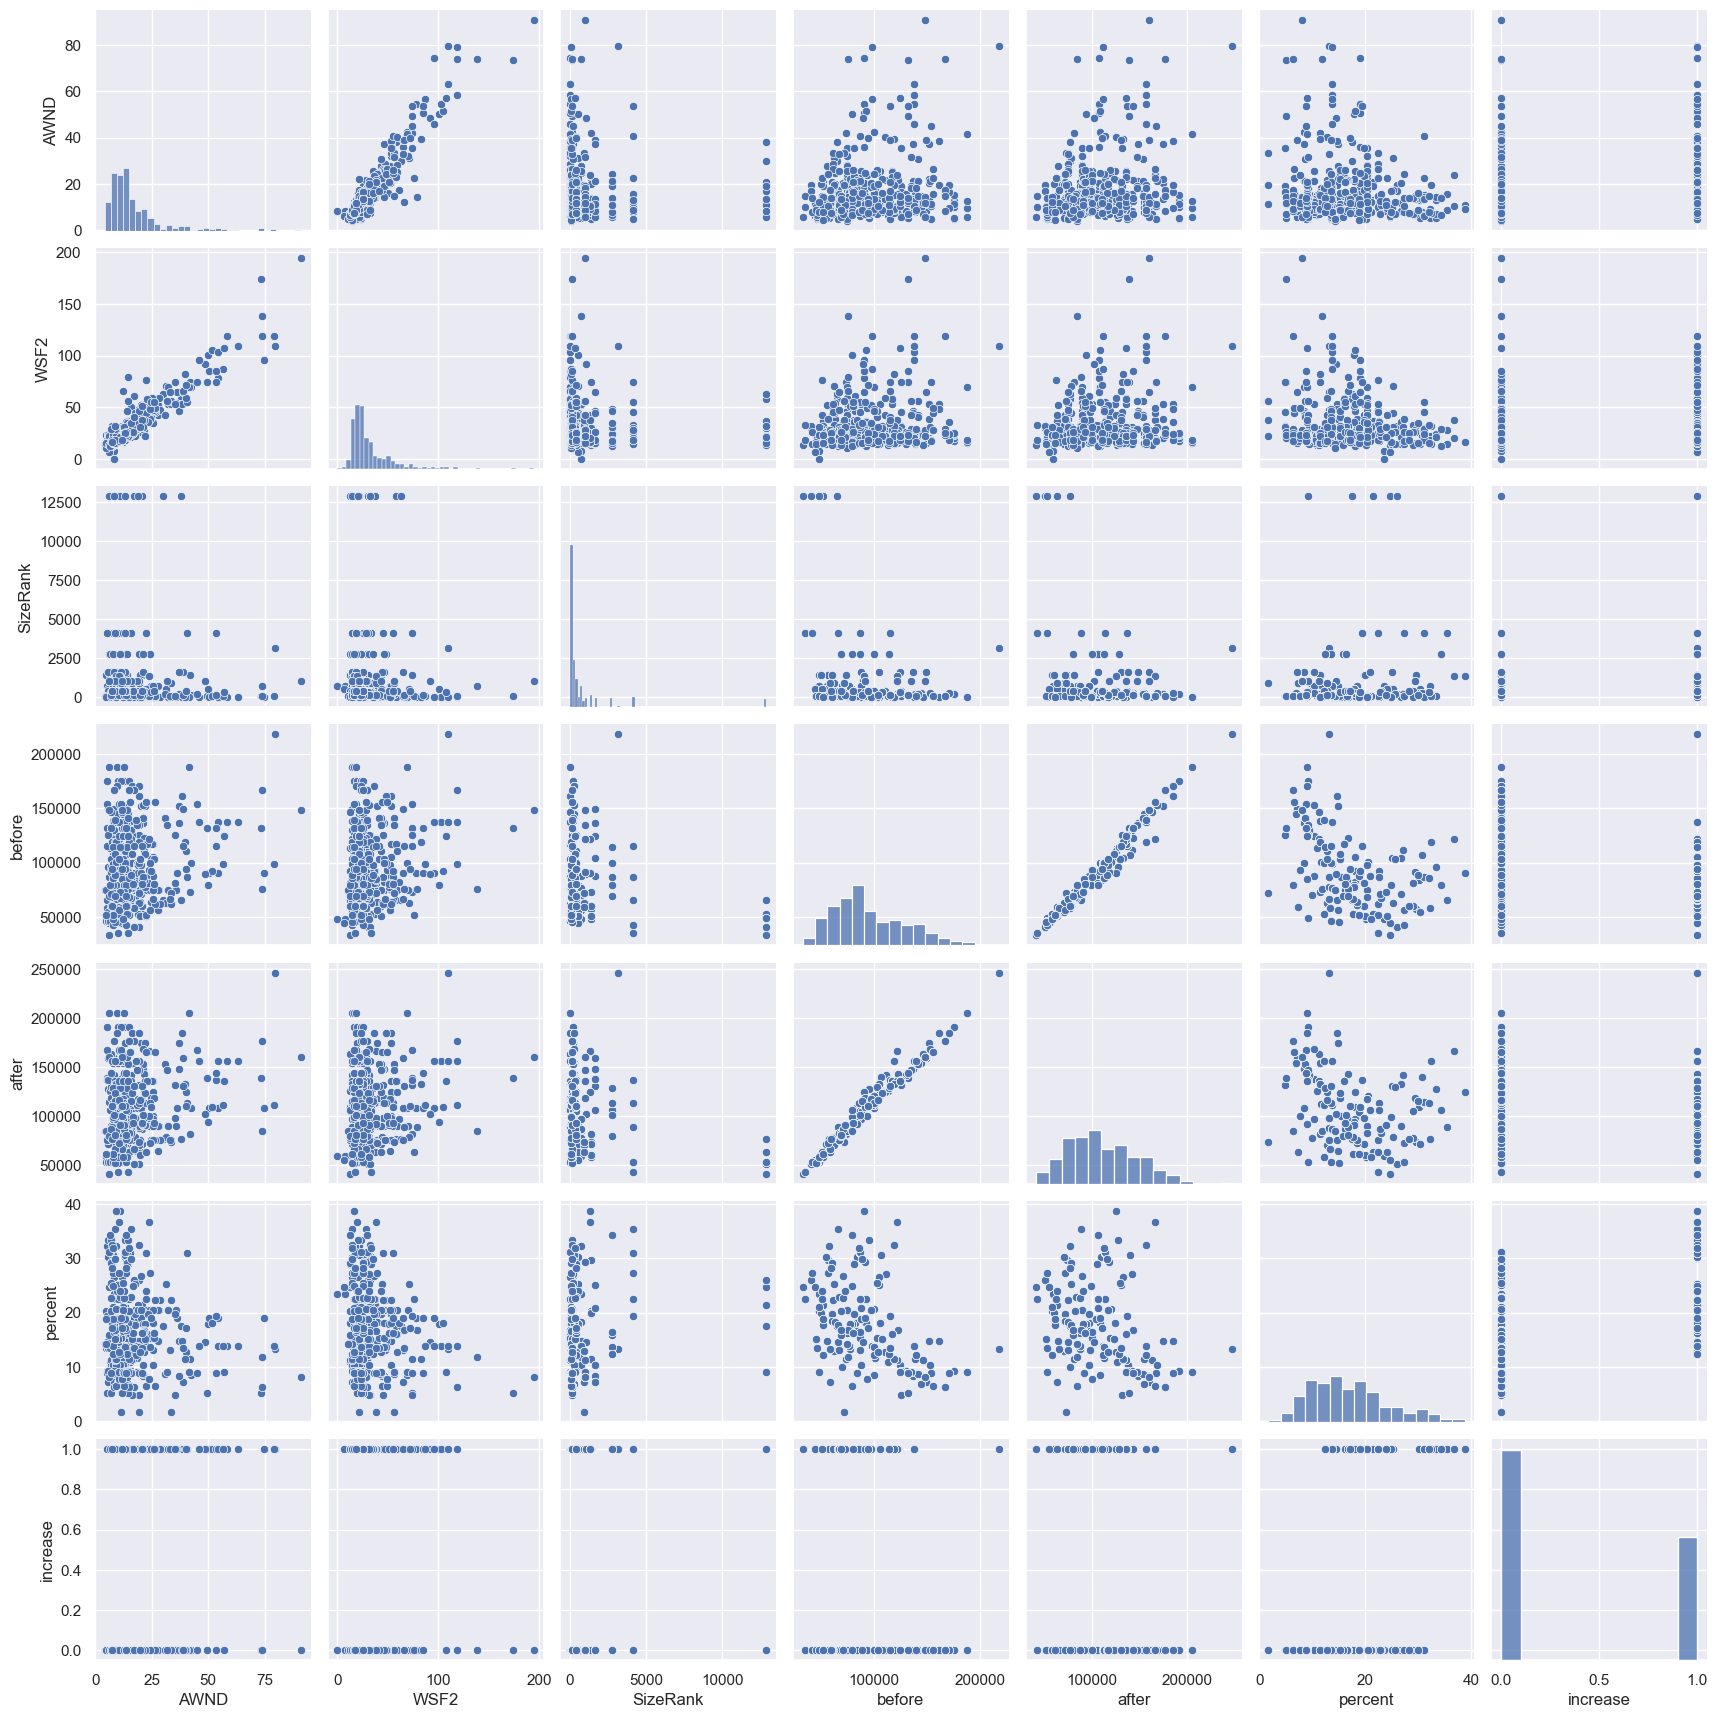

In [48]:
#using a pairplot to check for homoscedastiscity 
#in the most correlated variables 
sns.set()
sns.pairplot(bottom_hurricane, size = 2.5)
plt.show();

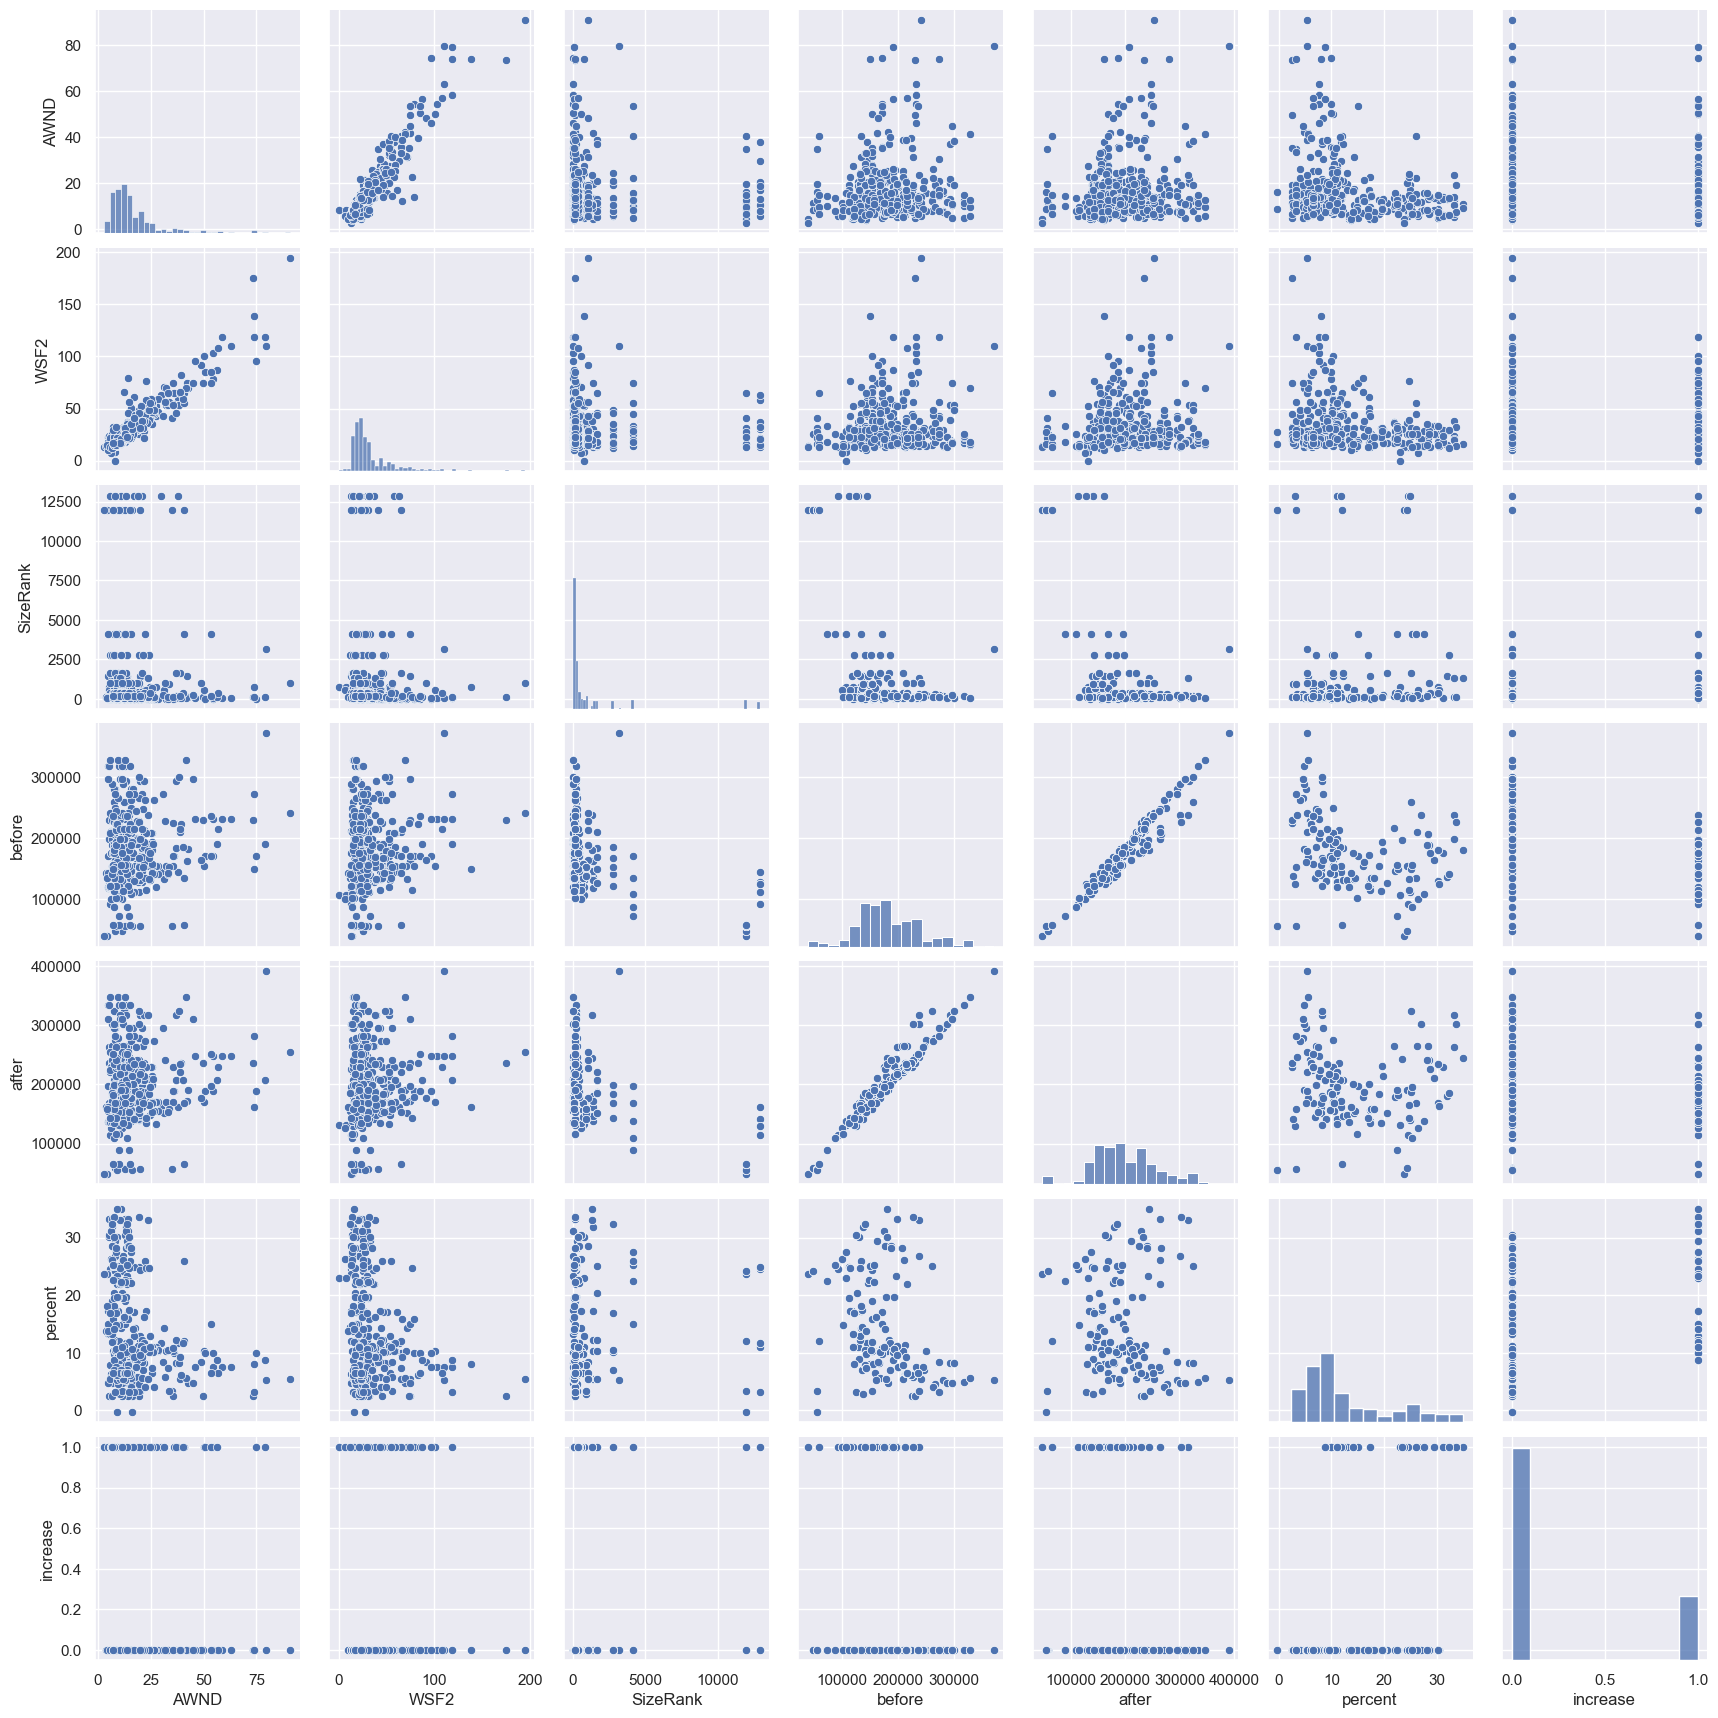

In [49]:
#using a pairplot to check for homoscedastiscity 
#in the most correlated variables 
sns.set()
sns.pairplot(middle_hurricane, size = 2.5)
plt.show();

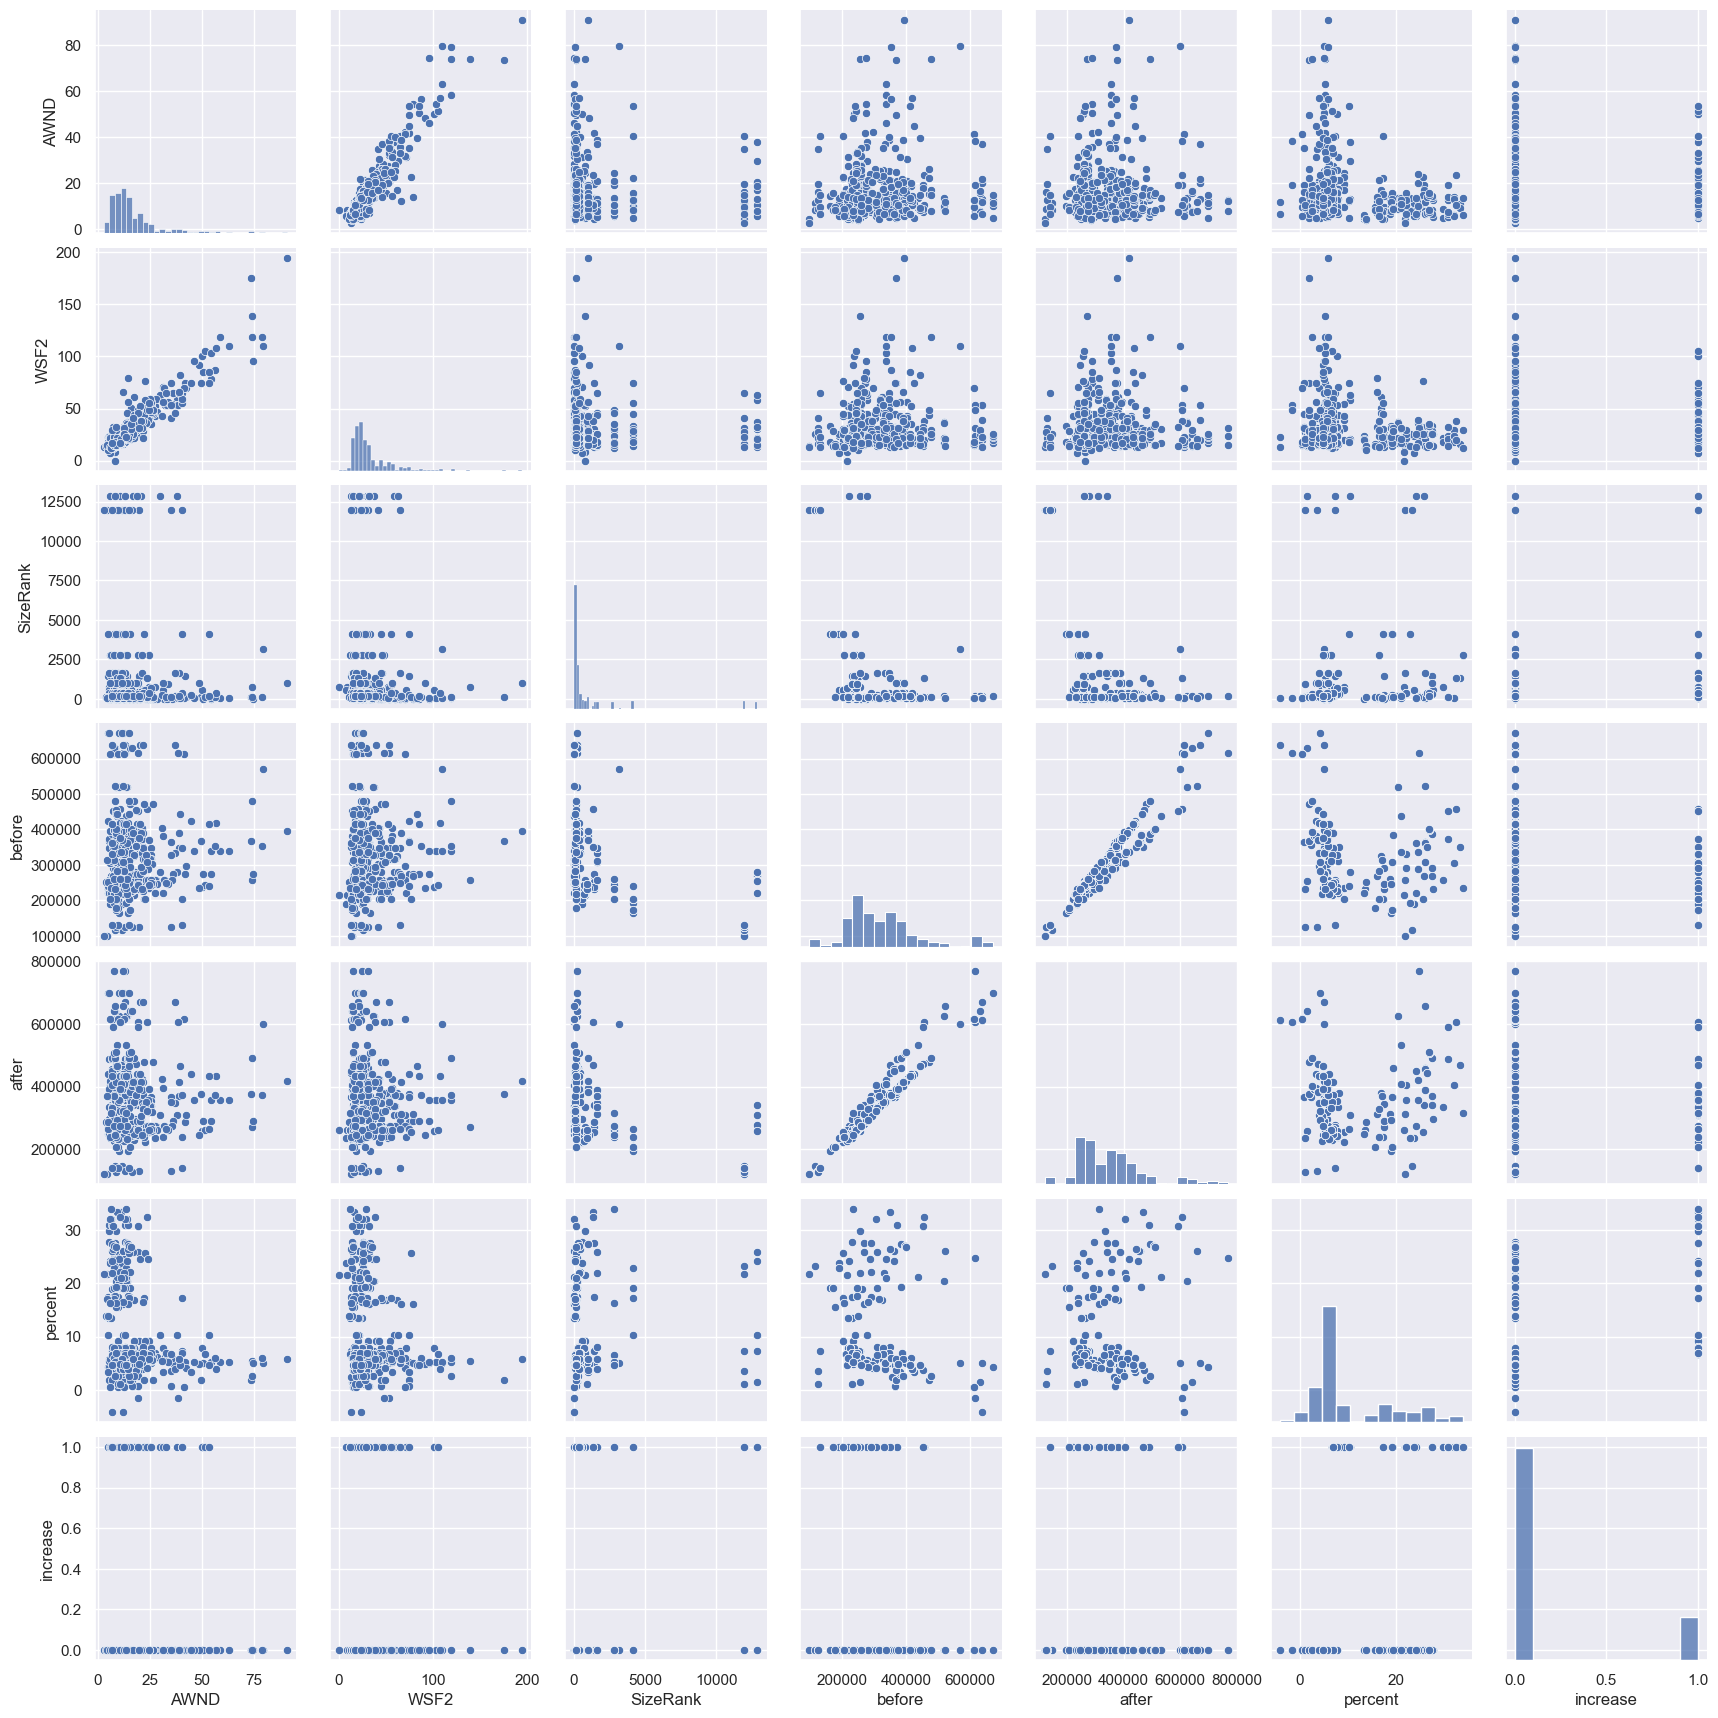

In [50]:
#using a pairplot to check for homoscedastiscity 
#in the most correlated variables 
sns.set()
sns.pairplot(top_hurricane, size = 2.5)
plt.show();

### Saving the Datasets

In [51]:
#saving the dataframes
bottom_hurricane.to_csv(r'data\bottom_hurricane.csv', index=False)
middle_hurricane.to_csv(r'data\middle_hurricane.csv', index=False)
top_hurricane.to_csv(r'data\top_hurricane.csv', index=False)
all_hurricane.to_csv(r'data\all_hurricane.csv', index=False)